In [1]:
##The required library are imported here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pyntcloud import PyntCloud
from pyntcloud import scalar_fields
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors.kde import KernelDensity
import keras
import tensorflow

Using TensorFlow backend.


In [2]:
##The point cloud dataset is taken as input and it is stored in the form of pandas dataframe
cloud=PyntCloud.from_file("/home/rahul/machine learning/Projects/rueMadame_database/GT_Madame1_2.ply")
print(cloud)

PyntCloud
10000000 points with 3 scalar fields
0 faces in mesh
0 kdtrees
0 voxelgrids
Centroid: -7.090676784515381, -124.74476623535156, 45.12932205200195
Other attributes:



In [3]:
cloud.points.head()

,x,y,z,reflectance,label,class
0,4.971637,-79.606361,43.221432,135.0,13,1
1,3.571728,-81.574989,42.445904,195.0,323,2
2,4.993350,-79.458405,43.303757,135.0,13,1
3,3.720481,-81.474182,42.465771,195.0,323,2
4,5.009287,-79.310478,43.387627,155.0,13,1


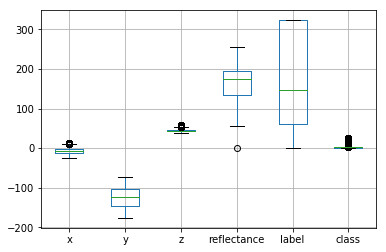

In [4]:
cloud.points.boxplot()

In [5]:
##Visualization of point cloud
cloud.plot()

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(-7.090676784515381, -51.14215087890625, 163.…

In [6]:
cloud1=PyntCloud.from_file("/home/rahul/machine learning/Projects/rueMadame_database/GT_Madame1_3.ply")
print(cloud1)

PyntCloud
10000000 points with 3 scalar fields
0 faces in mesh
0 kdtrees
0 voxelgrids
Centroid: -12.104286193847656, -197.56027221679688, 46.1270637512207
Other attributes:



In [7]:
cloud1.plot()

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(-12.104286193847656, -35.43043518066406, 166…

In [ ]:
#voxel grid downsampling will be done here
#open3d.voxelgrid_downsampling(cloud,voxel=0.5)

In [9]:
##Cacluate 10 neighbours for determining the geometrical features of each point
neigh=cloud.get_neighbors(k=10)


In [10]:
neigh.shape

(10000000, 50)

In [ ]:
kde=KernelDensity(kernel='gaussian',bandwidth=0.2).fit(cloud.points[['x','y','z']])
density=kde.score_samples(cloud.points[['x','y','z']])
cloud.points.add(density,axis=1)
vox=cloud.add_structure("voxel_grid",x_y_z=cloud.points[['x','y','z']])
vox_x=cloud.add_scalar_field("voxel_x",voxelgrid_id=vox)
vox_y=cloud.add_scalar_field("voxel_y",voxelgrid_id=vox)
vox_z=cloud.add_scalar_field("voxel_z",voxelgrid_id=vox)
inc=cloud.add_scalar_field("inclination_degrees")
ori=cloud.add_scalar_field("orientation_degrees")
eig=cloud.add_scalar_field("eigen_values",k_neighbors=neigh)
ani=cloud.add_scalar_field("anisotrophy",ev=eig)
cur=cloud.add_scalar_field("curvature",ev=eig)
eigent=cloud.add_scalar_field("eigentrophy"ev=eig)
su=cloud.add_scalar_fields("eigensum",ev=eig)
lin=cloud.add_scalar_fields("linearity",ev=eig)
om=cloud.add_scalar_fields("omnivariance",ev=eig)
pla=cloud.add_scalar_fields("planarity",ev=eig)
sph=cloud.add_scalar_fields.("sphericity",ev=eig)

In [8]:
cloud.points.drop(labels=["label"],inplace=True,axis=1)
cloud.points.drop(labels=["x","y","z","reflectance"],inplace=True,axis=1)

In [ ]:
tree=RandomForestClassifier()

In [ ]:
target=cloud.points["class"]
cloud.points.drop(labels=["class"],inplace=True,axis=1)

In [ ]:
tree.fit(cloud,target)

In [ ]:
prediction=forest.predict(cloud)
print("Accuracy:",accuracy_score(target,prediction))

This is the part where the feature extraction process is applied on the test set

In [ ]:
#voxel grid downsampling will be done here
#open3d.voxelgrid_downsampling(cloud1,voxel=0.5)

In [ ]:
#p linkage segmentation and feature histogram analyzer

In [ ]:
cloud1.plot()

In [ ]:
neigh1=cloud1.get_neighbors(k=50)

In [ ]:
neigh1.shape

In [ ]:
kde=KernelDensity(kernel='gaussian',bandwidth=0.2).fit(cloud.points[['x','y','z']])
density=kde.score_samples(cloud.points[['x','y','z']])
cloud.points.add(density,axis=1)
vox=cloud.add_structure("voxel_grid",x_y_z=cloud.points[['x','y','z']])
vox_x=cloud.add_scalar_field("voxel_x",voxelgrid_id=vox)
vox_y=cloud.add_scalar_field("voxel_y",voxelgrid_id=vox)
vox_z=cloud.add_scalar_field("voxel_z",voxelgrid_id=vox)
inc=cloud.add_scalar_field("inclination_degrees")
ori=cloud.add_scalar_field("orientation_degrees")
eig=cloud.add_scalar_field("eigen_values",k_neighbors=neigh)
ani=cloud.add_scalar_field("anisotrophy",ev=eig)
cur=cloud.add_scalar_field("curvature",ev=eig)
eigent=cloud.add_scalar_field("eigentrophy"ev=eig)
su=cloud.add_scalar_fields("eigensum",ev=eig)
lin=cloud.add_scalar_fields("linearity",ev=eig)
om=cloud.add_scalar_fields("omnivariance",ev=eig)
pla=cloud.add_scalar_fields("planarity",ev=eig)
sph=cloud.add_scalar_fields.("sphericity",ev=eig)

In [ ]:
cloud.points.drop(labels=["label"],inplace=True,axis=1)
target1=cloud.points["class"]
cloud.points.drop(labels=["class"],inplace=True,axis=1)
cloud1.points.drop(labels=["x","y","z","reflectance"],inplace=True,axis=1)

In [ ]:
prediction1=forest.predict(cloud1)
print("Accuracy:",accuracy_score(target1,prediction1)